<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_3_3_Customer_Lifetime_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtyp

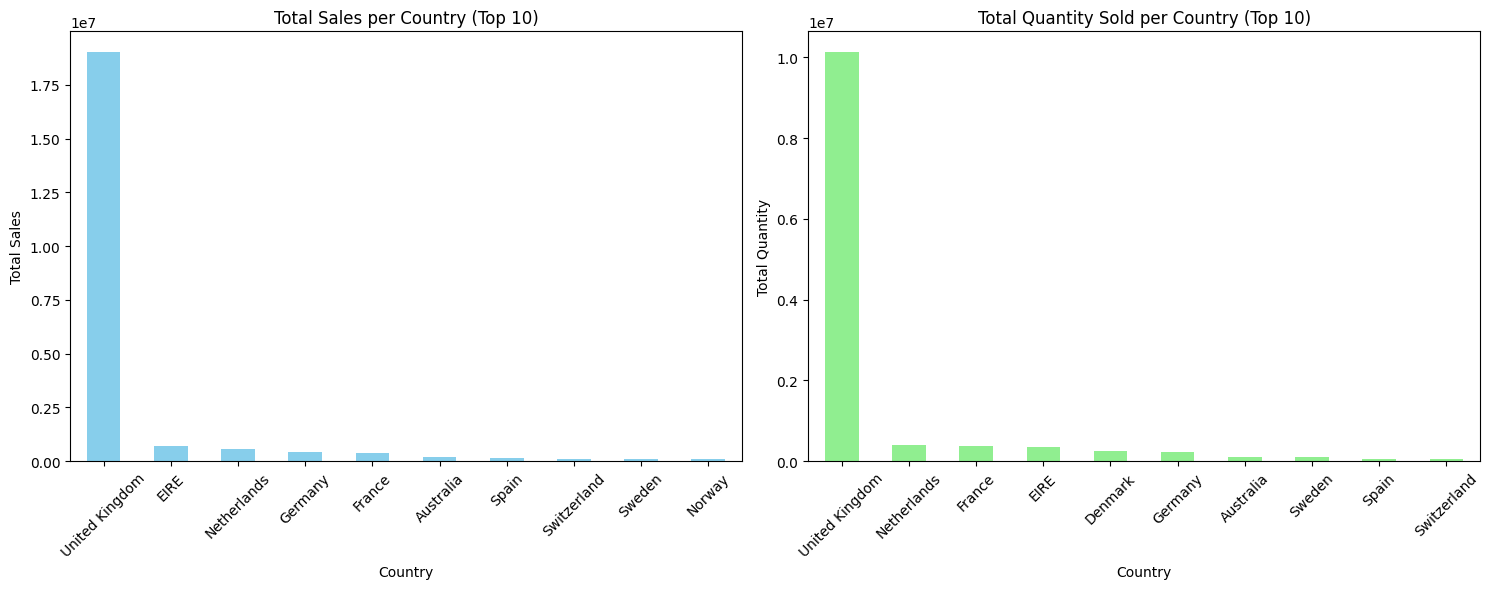


Mean Squared Error: 174526.86491082003
R-squared: 7.631369167293567e-05


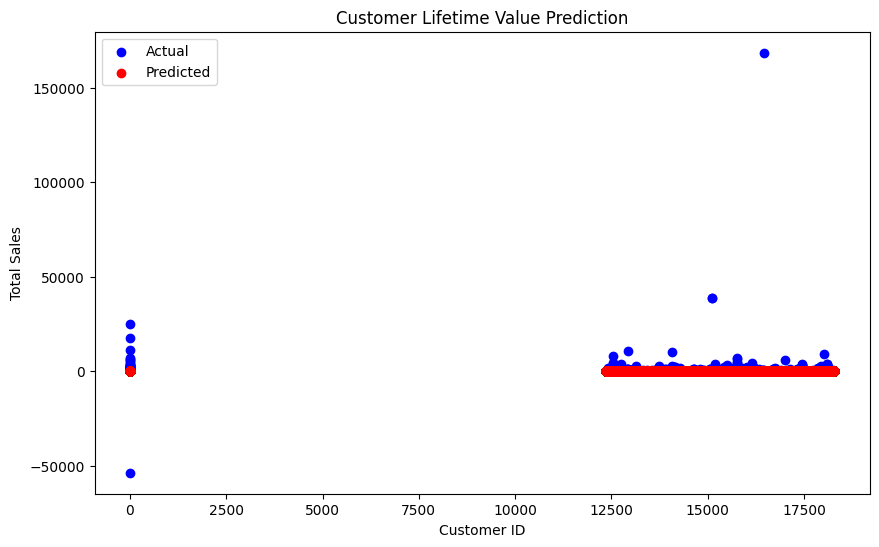

In [18]:
# Importing necessary libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for statistical data visualization
from sklearn.linear_model import LinearRegression # for linear regression model
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score # for model evaluation metrics

# Load the dataset
file_path = "/content/online_retail_II.csv" # file path to the dataset
data = pd.read_csv(file_path, parse_dates=['InvoiceDate']) # reading the dataset and parsing 'InvoiceDate' as datetime

# Display first 5 rows of the dataset
print("First 5 rows of the dataset:") # printing a message
print(data.head()) # displaying the first 5 rows of the dataset

# Basic information about the dataset
print("\nBasic Information about the dataset:") # printing a message
print(data.info()) # displaying basic information about the dataset

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:") # printing a message
print(data.describe()) # displaying summary statistics of the dataset

# Missing values in the dataset
print("\nMissing values in the dataset:") # printing a message
print(data.isnull().sum()) # displaying the count of missing values in each column

# Dropping rows with missing values in Description, Price, and Country columns
data.dropna(subset=['Description', 'Price', 'Country'], inplace=True) # dropping rows with missing values in specific columns

# Filling NaN values in Customer ID with -1
data['Customer ID'].fillna(-1, inplace=True) # filling NaN values in 'Customer ID' with -1

# Convert Customer ID to integer
data['Customer ID'] = data['Customer ID'].astype(int) # converting 'Customer ID' to integer type

# Convert Quantity to absolute values
data['Quantity'] = data['Quantity'].abs() # converting 'Quantity' to absolute values

# Convert InvoiceDate to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) # ensuring 'InvoiceDate' is in datetime format

# Create 'TotalSales' column
data['TotalSales'] = data['Quantity'] * data['Price'] # creating a new column 'TotalSales' by multiplying 'Quantity' and 'Price'

# Explore cleaned dataset
print("\nNaN counts after conversion:") # printing a message
print(data.isnull().sum().sum()) # displaying the total count of NaN values in the cleaned dataset

print("\nColumns in the dataset:") # printing a message
print(data.columns) # displaying the column names in the dataset

print("\nInformation about the cleaned dataset:") # printing a message
print(data.info()) # displaying basic information about the cleaned dataset

# Perform EDA and save graphs
plt.figure(figsize=(15, 6)) # setting the figure size for the plots

# Total sales per country
total_sales_country = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False) # grouping data by 'Country' and calculating total sales
plt.subplot(1, 2, 1) # creating a subplot
total_sales_country.head(10).plot(kind='bar', color='skyblue') # plotting the top 10 total sales per country as a bar chart
plt.title('Total Sales per Country (Top 10)') # setting the title of the plot
plt.ylabel('Total Sales') # setting the y-axis label
plt.xlabel('Country') # setting the x-axis label
plt.xticks(rotation=45) # rotating the x-axis labels for better readability
plt.tight_layout() # adjusting the layout

# Total quantity sold per country
total_quantity_country = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False) # grouping data by 'Country' and calculating total quantity sold
plt.subplot(1, 2, 2) # creating another subplot
total_quantity_country.head(10).plot(kind='bar', color='lightgreen') # plotting the top 10 total quantity sold per country as a bar chart
plt.title('Total Quantity Sold per Country (Top 10)') # setting the title of the plot
plt.ylabel('Total Quantity') # setting the y-axis label
plt.xlabel('Country') # setting the x-axis label
plt.xticks(rotation=45) # rotating the x-axis labels for better readability
plt.tight_layout() # adjusting the layout

plt.savefig('/content/total_sales_quantity_per_country.pdf') # saving the plot as a PDF file

# Save cleaned dataset to CSV
cleaned_file_path = "/content/cleaned_online_retail.csv" # file path for the cleaned dataset
data.to_csv(cleaned_file_path, index=False) # saving the cleaned dataset to a CSV file

plt.show() # displaying the plot

# Customer Lifetime Value Prediction using Linear Regression
# Assuming Total Sales as dependent variable and Customer ID as independent variable
X = data[['Customer ID']] # defining 'Customer ID' as the independent variable
y = data['TotalSales'] # defining 'TotalSales' as the dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the data into training and testing sets with 80-20 ratio

# Initialize Linear Regression model
model = LinearRegression() # initializing the linear regression model

# Fit the model on the training data
model.fit(X_train, y_train) # fitting the model on the training data

# Predicting on the test data
y_pred = model.predict(X_test) # predicting the total sales on the test data

# Model evaluation
mse = mean_squared_error(y_test, y_pred) # calculating the mean squared error
r2 = r2_score(y_test, y_pred) # calculating the R-squared value

print(f"\nMean Squared Error: {mse}") # printing the mean squared error
print(f"R-squared: {r2}") # printing the R-squared value

# Plotting the predictions
plt.figure(figsize=(10, 6)) # setting the figure size for the plot
plt.scatter(X_test, y_test, color='blue', label='Actual') # plotting the actual values
plt.scatter(X_test, y_pred, color='red', label='Predicted') # plotting the predicted values
plt.title('Customer Lifetime Value Prediction') # setting the title of the plot
plt.xlabel('Customer ID') # setting the x-axis label
plt.ylabel('Total Sales') # setting the y-axis label
plt.legend() # adding a legend to the plot
plt.savefig('/content/clv_prediction_scatter.pdf') # saving the plot as a PDF file
plt.show() # displaying the plot
